# Ground Cricket Chirps

In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.


# Tasks:

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

# Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

# Data cleaning

In [ ]:
df.shape

(15, 2)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.shape

(15, 2)

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
iqr = df['Ground Temperature'].quantile(0.75) - df['Ground Temperature'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Ground Temperature'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Ground Temperature'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 10.0
Upper Threshold : 98.4
Lower Threshold : 58.400000000000006


# EDA

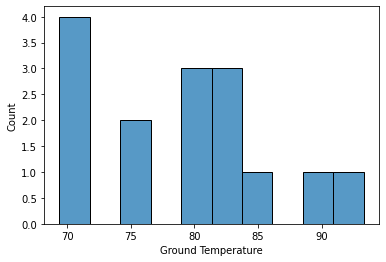

In [ ]:
sns.histplot(df['Ground Temperature'], bins = 10)
plt.show()

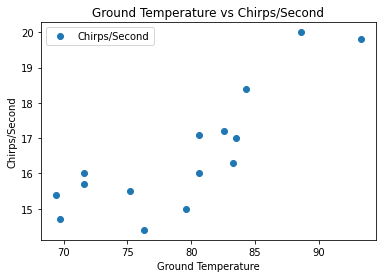

In [ ]:
df.plot(x = 'Ground Temperature', y = 'Chirps/Second', style = 'o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


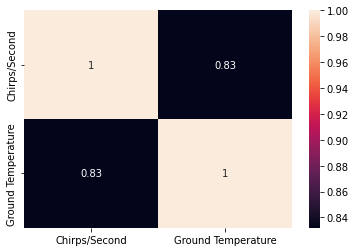

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

As there is a strong positive correlation, we can proceed with linear regression model.

# Data preprocessing

In [ ]:
X = df[['Ground Temperature']].values  # Feature
y = df['Chirps/Second'].values         # Target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)

We have split the data into train and test for model training.


*   70% for training
*   30% for testing



In [ ]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)  # c
print(regressor.coef_)       # m

0.5634436220793368
[0.20208219]


In [ ]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.2021 * x + 0.5634


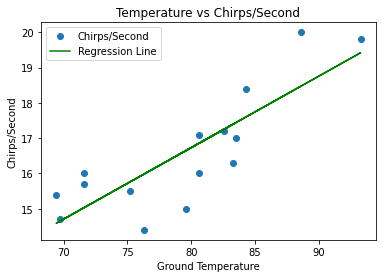

In [ ]:
df.plot(x = 'Ground Temperature', y = 'Chirps/Second', style = 'o')
plt.plot(X, regressor.predict(X), color='green', label = 'Regression Line')
plt.title('Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.legend()
plt.show()

# Prediction

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
compare = pd.DataFrame({'Actual_value' : y_test, 'Predicted_value' : y_pred})
compare

,Actual_value,Predicted_value
0,17.2,17.255432
1,14.7,14.648572
2,17.1,16.851268
3,19.8,19.417712
4,16.3,17.396890


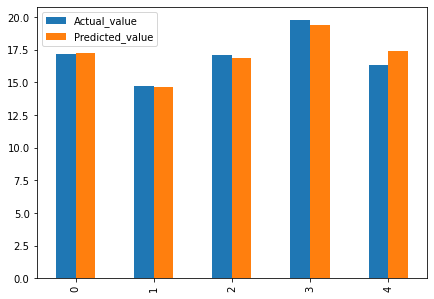

In [ ]:
compare.plot(kind = 'bar', figsize = (7,5))
plt.show()

# Evaluation of model

In [ ]:
from sklearn import metrics
print('R2- SCORE :', regressor.score(X_test,y_test))

R2- SCORE : 0.8963347332387839


From this, we can see that the R2 - Score value is 0.89 which is very good.

So, we can conclude saying that our model accuracy is 89% which means this is a very good model.

In [ ]:
# Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
regressor.predict([[95]])

array([19.76125143])

When the ground temperature reached 95, the crickets would be chirping at the rate of 19.76 chirps/second.

In [ ]:
# Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. 
# What was the approximate ground temperature that morning?
(18 - regressor.intercept_) / regressor.coef_[0]

86.2844795667431

If the crickets were chirping at a rate of 18 chirps per second, then the approximate ground temperature that morning would be 86.28.